In [18]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('final_griddata_3.csv')

# Drop the 'date' column
df.drop(columns=['date'], inplace=True)

# Print the modified DataFrame
print(df)

# Save the modified DataFrame to a new CSV file
df.to_csv('modified_final_griddata_3.csv', index=False)

print("DataFrame saved to 'modified_final_griddata_3.csv'")

             p1        p2        p3        c1        c2        c3  stability   
0      0.859578  0.887445  0.958034 -0.782604 -1.257395 -1.723086          0  \
1      0.862414  0.562139  0.781760 -1.940058 -1.872742 -1.255012          1   
2      0.766689  0.839444  0.109853 -1.207456 -1.277210 -0.920492          0   
3      0.976744  0.929381  0.362718 -1.027473 -1.938944 -0.997374          0   
4      0.455450  0.656947  0.820923 -1.125531 -1.845975 -0.554305          0   
...         ...       ...       ...       ...       ...       ...        ...   
43818  0.257940  0.895296  0.868929 -1.954289 -0.981347 -1.654103          1   
43819  0.848075  0.909264  0.266201 -1.428185 -0.525543 -1.545585          1   
43820  0.393902  0.441923  0.697164 -0.701491 -1.279522 -1.019624          0   
43821  0.280877  0.532758  0.368188 -1.076426 -1.231602 -1.164986          1   
43822  0.237036  0.891977  0.656815 -1.579196 -1.526573 -0.571834          0   

       year  month  day  hour  minute  

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('final_griddata_3.csv')

features = df[['p1', 'p2', 'p3', 'c1', 'c2', 'c3', 'year', 'month', 'day', 'hour', 'minute', 'seconds', 'milliseconds', 'g1', 'g2', 'g3']]
target = df['stability']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=200)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict stability for new data (you need to replace 'new_data' with your new data)
# new_data = ...
# stability_prediction = rf_model.predict(new_data)


Accuracy: 0.7015402167712493


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
df = pd.read_csv('final_griddata_3.csv')

# Assuming 'stability' is the target variable, and other columns are features
features = df[['p1', 'p2', 'p3', 'c1', 'c2', 'c3', 'year', 'month', 'day', 'hour', 'minute', 'seconds', 'milliseconds', 'g1', 'g2', 'g3']]
target = df['stability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluate the model
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict stability for new data (you need to replace 'new_data' with your new data)
# new_data = ...
# stability_prediction = logistic_model.predict(new_data)


Accuracy: 0.7171705647461495


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
  Using cached matplotlib-3.8.4-cp311-cp311-win_amd64.whl (7.7 MB)




[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


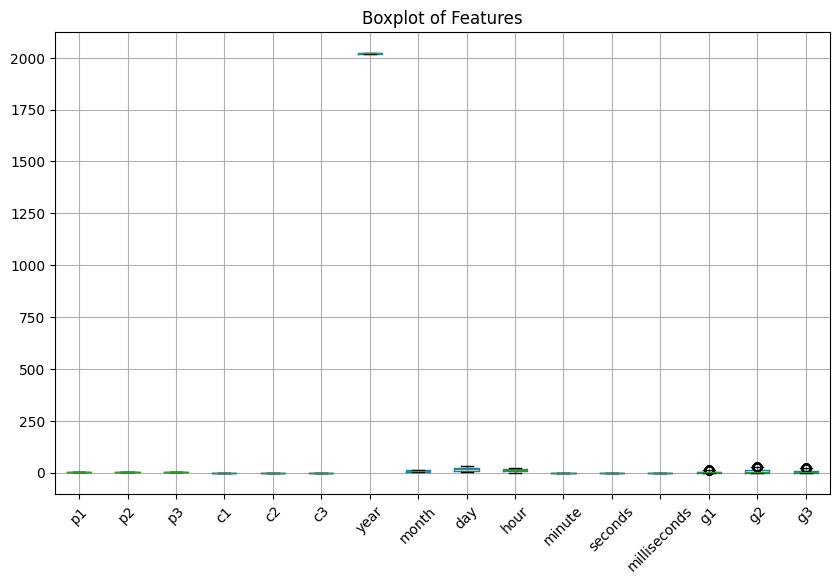

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final_griddata_3.csv')

features = df[['p1', 'p2', 'p3', 'c1', 'c2', 'c3', 'year', 'month', 'day', 'hour', 'minute', 'seconds', 'milliseconds', 'g1', 'g2', 'g3']]

plt.figure(figsize=(10, 6))
features.boxplot()
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

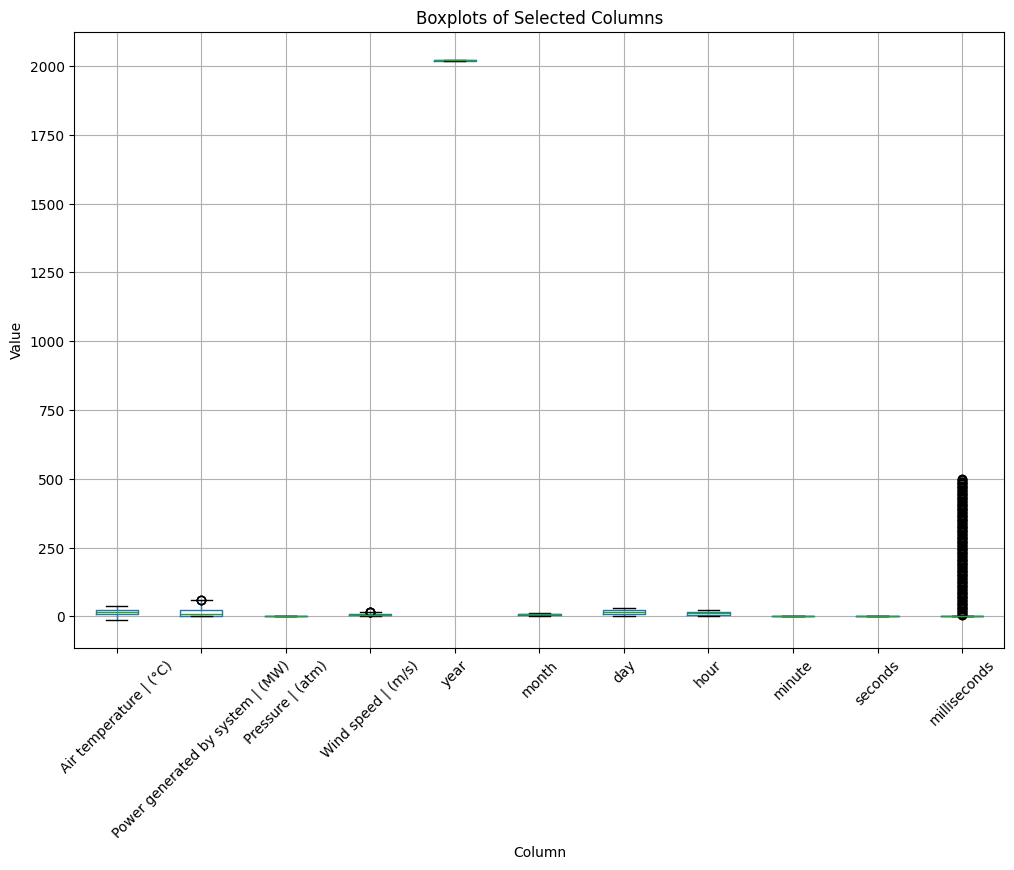

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final_2_data.csv')

columns_of_interest = ['Air temperature | (°C)', 'Power generated by system | (MW)', 'Pressure | (atm)', 'Wind speed | (m/s)', 'year', 'month', 'day', 'hour', 'minute', 'seconds', 'milliseconds']

plt.figure(figsize=(12, 8))
df[columns_of_interest].boxplot()
plt.title('Boxplots of Selected Columns')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.xlabel('Column')
plt.show()


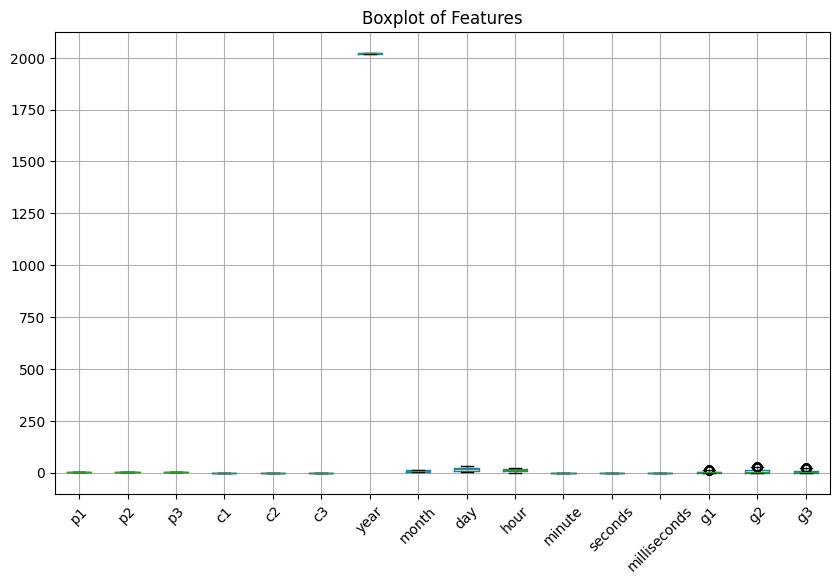

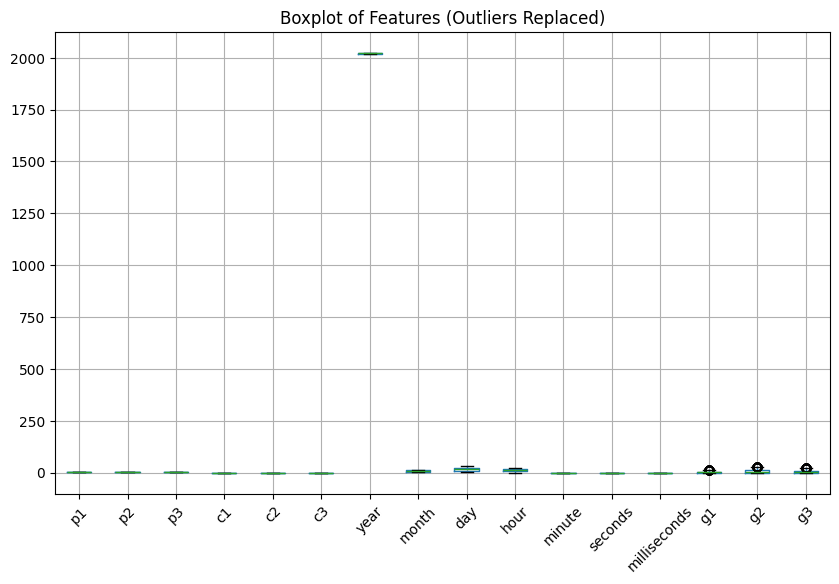

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final_griddata_3.csv')

columns_of_interest = ['p1', 'p2', 'p3', 'c1', 'c2', 'c3', 'year', 'month', 'day', 'hour', 'minute', 'seconds', 'milliseconds', 'g1', 'g2', 'g3']

plt.figure(figsize=(10, 6))
df[columns_of_interest].boxplot()
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

g1_mean = df['g1'].mean()

threshold = 3 * df['g1'].std()

outliers = (df['g1'] - g1_mean).abs() > threshold

df.loc[outliers, 'g1'] = g1_mean

plt.figure(figsize=(10, 6))
df[columns_of_interest].boxplot()
plt.title('Boxplot of Features (Outliers Replaced)')
plt.xticks(rotation=45)
plt.show()

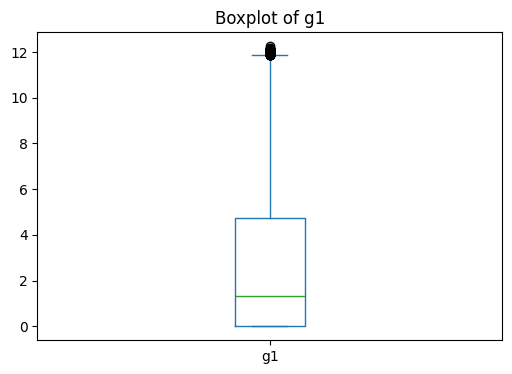

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final_griddata_3.csv')

plt.figure(figsize=(6, 4))
df['g1'].plot(kind='box')
plt.title('Boxplot of g1')
plt.show()


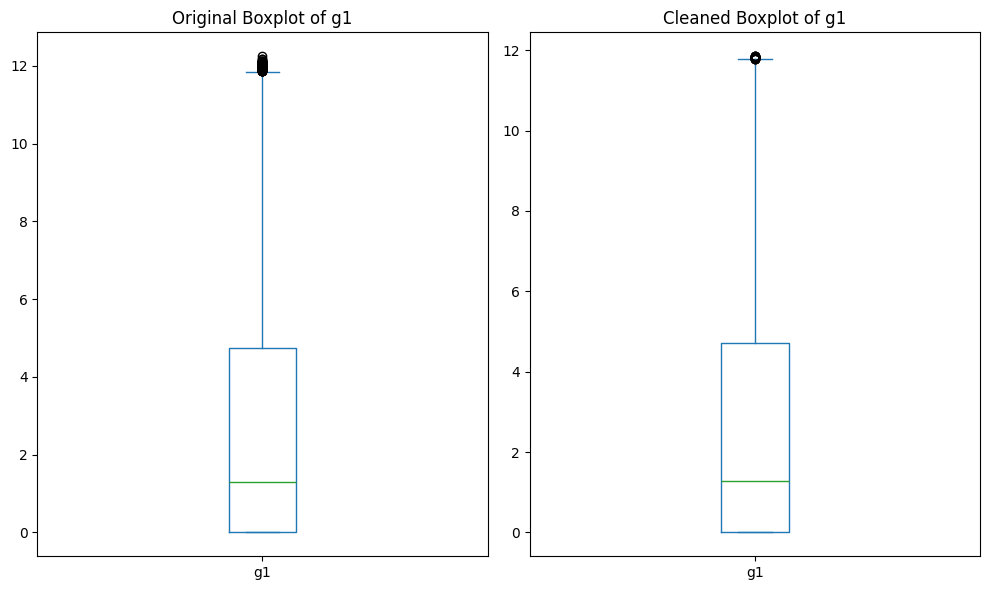

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final_griddata_3.csv')

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  
df['g1'].plot(kind='box')
plt.title('Original Boxplot of g1')

Q1 = df['g1'].quantile(0.25)
Q3 = df['g1'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['g1'] < lower_bound) | (df['g1'] > upper_bound)

df_cleaned = df[~outliers]

plt.subplot(1, 2, 2)  
df_cleaned['g1'].plot(kind='box')
plt.title('Cleaned Boxplot of g1')

plt.tight_layout()

plt.show()


In [16]:
df.shape

(43823, 18)

In [22]:
meta_data= pd.read_csv("modified_final_griddata_3.csv")
print(meta_data)

             p1        p2        p3        c1        c2        c3  stability   
0      0.859578  0.887445  0.958034 -0.782604 -1.257395 -1.723086          0  \
1      0.862414  0.562139  0.781760 -1.940058 -1.872742 -1.255012          1   
2      0.766689  0.839444  0.109853 -1.207456 -1.277210 -0.920492          0   
3      0.976744  0.929381  0.362718 -1.027473 -1.938944 -0.997374          0   
4      0.455450  0.656947  0.820923 -1.125531 -1.845975 -0.554305          0   
...         ...       ...       ...       ...       ...       ...        ...   
43818  0.257940  0.895296  0.868929 -1.954289 -0.981347 -1.654103          1   
43819  0.848075  0.909264  0.266201 -1.428185 -0.525543 -1.545585          1   
43820  0.393902  0.441923  0.697164 -0.701491 -1.279522 -1.019624          0   
43821  0.280877  0.532758  0.368188 -1.076426 -1.231602 -1.164986          1   
43822  0.237036  0.891977  0.656815 -1.579196 -1.526573 -0.571834          0   

       year  month  day  hour  minute  

In [23]:
import pandas as pd

meta_data = pd.read_csv("modified_final_griddata_3.csv")

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

meta_data_cleaned = remove_outliers_iqr(meta_data, 'g1')
meta_data_cleaned = remove_outliers_iqr(meta_data_cleaned, 'g2')
meta_data_cleaned = remove_outliers_iqr(meta_data_cleaned, 'g3')

# Print the cleaned DataFrame
print(meta_data_cleaned)

# Save the cleaned DataFrame to a new CSV file
meta_data_cleaned.to_csv('cleaned_final_griddata.csv', index=False)

print("Cleaned DataFrame saved to 'cleaned_final_griddata.csv'")


             p1        p2        p3        c1        c2        c3  stability   
0      0.859578  0.887445  0.958034 -0.782604 -1.257395 -1.723086          0  \
1      0.862414  0.562139  0.781760 -1.940058 -1.872742 -1.255012          1   
2      0.766689  0.839444  0.109853 -1.207456 -1.277210 -0.920492          0   
3      0.976744  0.929381  0.362718 -1.027473 -1.938944 -0.997374          0   
4      0.455450  0.656947  0.820923 -1.125531 -1.845975 -0.554305          0   
...         ...       ...       ...       ...       ...       ...        ...   
43818  0.257940  0.895296  0.868929 -1.954289 -0.981347 -1.654103          1   
43819  0.848075  0.909264  0.266201 -1.428185 -0.525543 -1.545585          1   
43820  0.393902  0.441923  0.697164 -0.701491 -1.279522 -1.019624          0   
43821  0.280877  0.532758  0.368188 -1.076426 -1.231602 -1.164986          1   
43822  0.237036  0.891977  0.656815 -1.579196 -1.526573 -0.571834          0   

       year  month  day  hour  minute  

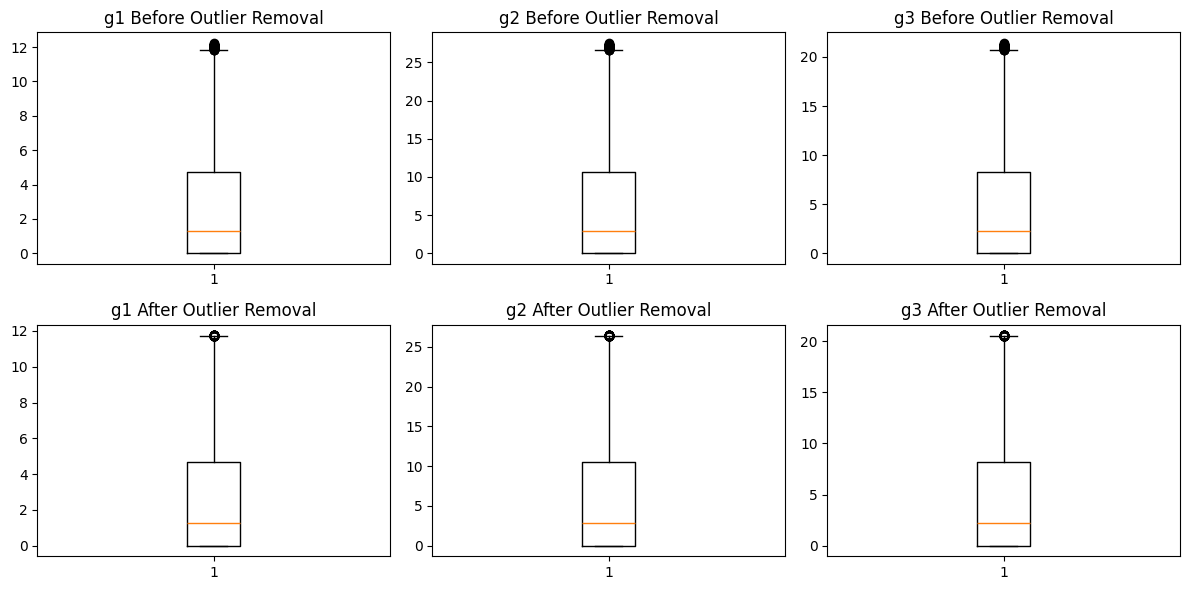

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

meta_data = pd.read_csv("modified_final_griddata_3.csv")

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

meta_data_cleaned = remove_outliers_iqr(meta_data, 'g1')
meta_data_cleaned = remove_outliers_iqr(meta_data_cleaned, 'g2')
meta_data_cleaned = remove_outliers_iqr(meta_data_cleaned, 'g3')

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.boxplot(meta_data['g1'])
plt.title('g1 Before Outlier Removal')

plt.subplot(2, 3, 2)
plt.boxplot(meta_data['g2'])
plt.title('g2 Before Outlier Removal')

plt.subplot(2, 3, 3)
plt.boxplot(meta_data['g3'])
plt.title('g3 Before Outlier Removal')

plt.subplot(2, 3, 4)
plt.boxplot(meta_data_cleaned['g1'])
plt.title('g1 After Outlier Removal')

plt.subplot(2, 3, 5)
plt.boxplot(meta_data_cleaned['g2'])
plt.title('g2 After Outlier Removal')

plt.subplot(2, 3, 6)
plt.boxplot(meta_data_cleaned['g3'])
plt.title('g3 After Outlier Removal')

plt.tight_layout()

plt.show()


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
df = pd.read_csv('modified_final_griddata_3.csv')

# Assuming 'stability' is the target variable, and other columns are features
features = df[['p1', 'p2', 'p3', 'c1', 'c2', 'c3', 'year', 'month', 'day', 'hour', 'minute', 'seconds', 'milliseconds', 'g1', 'g2', 'g3']]
target = df['stability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluate the model
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict stability for new data (you need to replace 'new_data' with your new data)
# new_data = ...
# stability_prediction = logistic_model.predict(new_data)


Accuracy: 0.7171705647461495


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
df = pd.read_csv('cleaned_meta_data.csv')

# Assuming 'stability' is the target variable, and other columns are features
features = df[['p1', 'p2', 'p3', 'c1', 'c2', 'c3', 'year', 'month', 'day', 'hour', 'minute', 'seconds', 'milliseconds', 'g1', 'g2', 'g3']]
target = df['stability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict stability for new data (you need to replace 'new_data' with your new data)
# new_data = ...
# stability_prediction = svm_model.predict(new_data)


Accuracy: 0.7106046724690792


Cleaned data saved to 'cleaned_meta_data.csv'


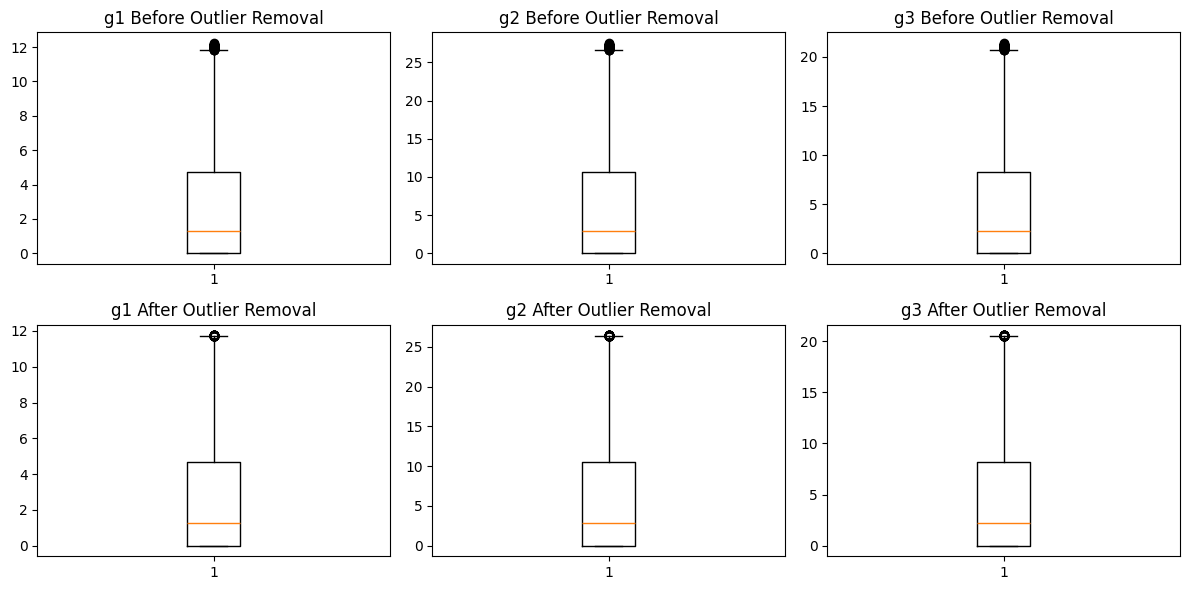

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the original CSV file into a DataFrame
meta_data = pd.read_csv("cleaned_meta_data.csv")

# Function to remove outliers using IQR method for a specific column
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'g1', 'g2', and 'g3' columns
meta_data_cleaned = remove_outliers_iqr(meta_data, 'g1')
meta_data_cleaned = remove_outliers_iqr(meta_data_cleaned, 'g2')
meta_data_cleaned = remove_outliers_iqr(meta_data_cleaned, 'g3')

# Plot the boxplots
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.boxplot(meta_data['g1'])
plt.title('g1 Before Outlier Removal')

plt.subplot(2, 3, 2)
plt.boxplot(meta_data['g2'])
plt.title('g2 Before Outlier Removal')

plt.subplot(2, 3, 3)
plt.boxplot(meta_data['g3'])
plt.title('g3 Before Outlier Removal')

plt.subplot(2, 3, 4)
plt.boxplot(meta_data_cleaned['g1'])
plt.title('g1 After Outlier Removal')

plt.subplot(2, 3, 5)
plt.boxplot(meta_data_cleaned['g2'])
plt.title('g2 After Outlier Removal')

plt.subplot(2, 3, 6)
plt.boxplot(meta_data_cleaned['g3'])
plt.title('g3 After Outlier Removal')

plt.tight_layout()

# Save cleaned data to a new CSV file
meta_data_cleaned.to_csv('cleaned_meta_data.csv', index=False)
print("Cleaned data saved to 'cleaned_meta_data.csv'")

plt.show()


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Read the cleaned data from the CSV file
cleaned_data = pd.read_csv('cleaned_meta_data.csv')

# Separate features and target variable
X = cleaned_data[['p1','p2','p3','c1','c2','c3','year','month','day','hour','minute','seconds','milliseconds','g1','g2','g3']]  # Features
y = cleaned_data['stability']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Evaluate the model
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, make predictions on new data
# new_data = ...
# stability_prediction = knn_model.predict(new_data)


Accuracy: 0.5819972514887769


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

# Read the cleaned data from the CSV file
cleaned_data = pd.read_csv('cleaned_meta_data.csv')

# Separate features and target variable
X = cleaned_data[['p1','p2','p3','c1','c2','c3','year','month','day','hour','minute','seconds','milliseconds','g1','g2','g3']]  # Features
y = cleaned_data['stability']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the LVQ model
lvq_model = NearestCentroid()
lvq_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lvq_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, make predictions on new data
# new_data = ...
# stability_prediction = lvq_model.predict(new_data)


Accuracy: 0.4733165368758589


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Read the cleaned data from the CSV file
cleaned_data = pd.read_csv('cleaned_meta_data.csv')

# Separate features and target variable
X = cleaned_data[['p1','p2','p3','c1','c2','c3','year','month','day','hour','minute','seconds','milliseconds','g1','g2','g3']]  # Features
y = cleaned_data['stability']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lda_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, make predictions on new data
# new_data = ...
# stability_prediction = lda_model.predict(new_data)


Accuracy: 0.7132386623912048


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the cleaned data from the CSV file
cleaned_data = pd.read_csv('cleaned_meta_data.csv')

# Separate features and target variable
X = cleaned_data[['p1','p2','p3','c1','c2','c3','year','month','day','hour','minute','seconds','milliseconds','g1','g2','g3']]  # Features
y = cleaned_data['stability']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Evaluate the model
y_pred = linear_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, make predictions on new data
# new_data = ...
# stability_prediction = linear_reg_model.predict(new_data)


Mean Squared Error: 0.19743314450104338


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Read the cleaned data from the CSV file
cleaned_data = pd.read_csv('cleaned_meta_data.csv')

# Separate features and target variable
X = cleaned_data[['g1','g2','g3']]  # Features
y = cleaned_data['stability']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=90)

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate the model
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, make predictions on new data
# new_data = ...
# stability_prediction = random_forest_model.predict(new_data)


Accuracy: 0.702427851580394


In [74]:
df = pd.read_csv('cleaned_meta_data.csv')
print(df.notnull().sum)



<bound method NDFrame._add_numeric_operations.<locals>.sum of          p1    p2    p3    c1    c2    c3  stability  year  month   day  hour   
0      True  True  True  True  True  True       True  True   True  True  True  \
1      True  True  True  True  True  True       True  True   True  True  True   
2      True  True  True  True  True  True       True  True   True  True  True   
3      True  True  True  True  True  True       True  True   True  True  True   
4      True  True  True  True  True  True       True  True   True  True  True   
...     ...   ...   ...   ...   ...   ...        ...   ...    ...   ...   ...   
43655  True  True  True  True  True  True       True  True   True  True  True   
43656  True  True  True  True  True  True       True  True   True  True  True   
43657  True  True  True  True  True  True       True  True   True  True  True   
43658  True  True  True  True  True  True       True  True   True  True  True   
43659  True  True  True  True  True  True      

In [78]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Read the cleaned data from the CSV file
cleaned_data = pd.read_csv('cleaned_meta_data.csv')

# Separate features and target variable
X = cleaned_data[['p1','p2','p3','c1','c2','c3','year','month','day','hour','minute','seconds','milliseconds','g1','g2','g3']]  # Features
y = cleaned_data['stability']  # Target variable

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X, y)

# Define specific values for g1, g2, and g3
new_data = pd.DataFrame({'g1': [0.9], 'g2': [1.4], 'g3': [2.6]})

# Make predictions on the new data
stability_prediction = random_forest_model.predict(new_data)

print("Predicted Stability:", stability_prediction)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- c1
- c2
- c3
- day
- hour
- ...
